In [52]:
# import libraries and load csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
df = pd.read_csv('./insurance.csv')

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df.shape

(1338, 7)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there is no null values

In [59]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


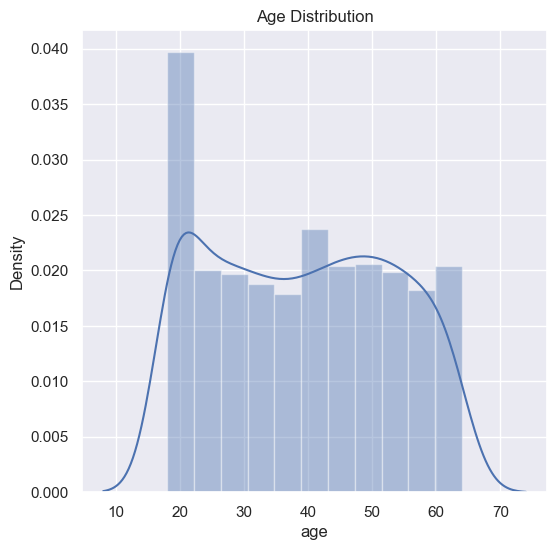

In [61]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

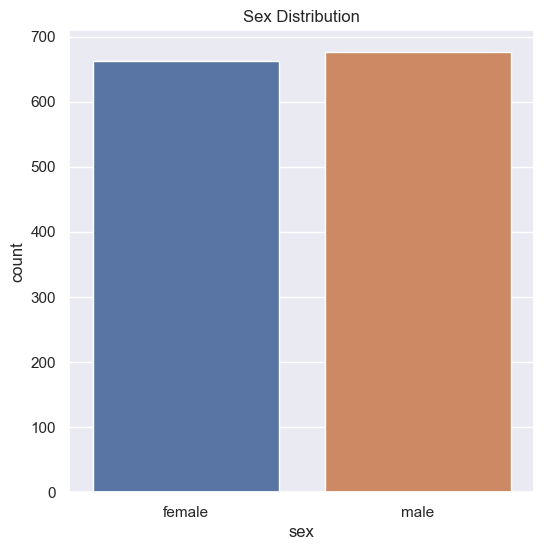

In [62]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()


In [63]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

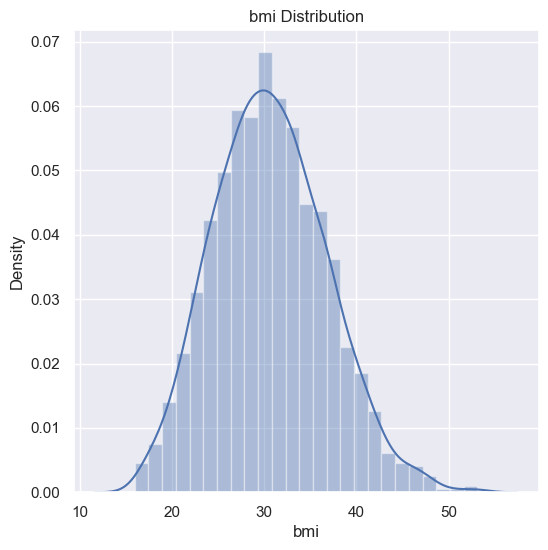

In [64]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

normal BMI range-18.5 to 24.0

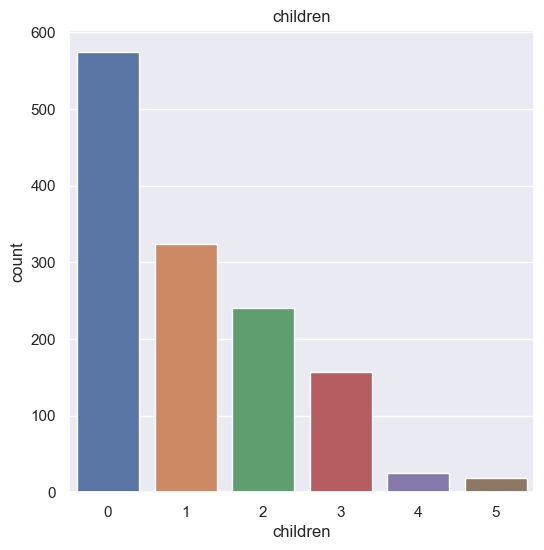

In [65]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

many people are there who have no children

In [66]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

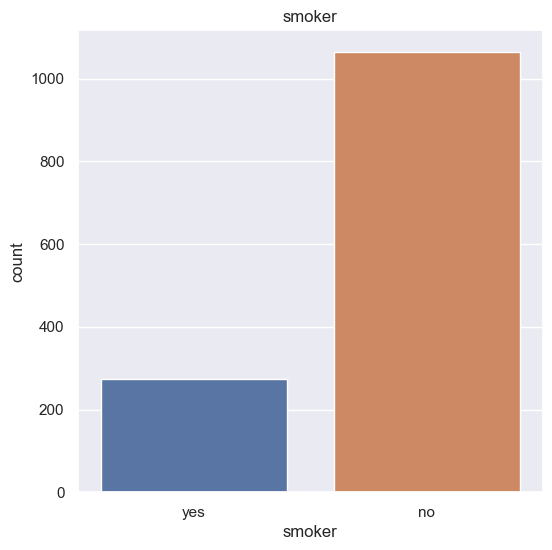

In [67]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

In [68]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

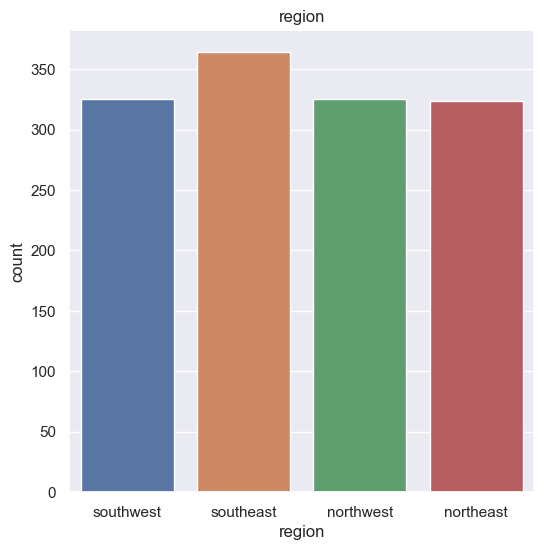

In [69]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

In [70]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

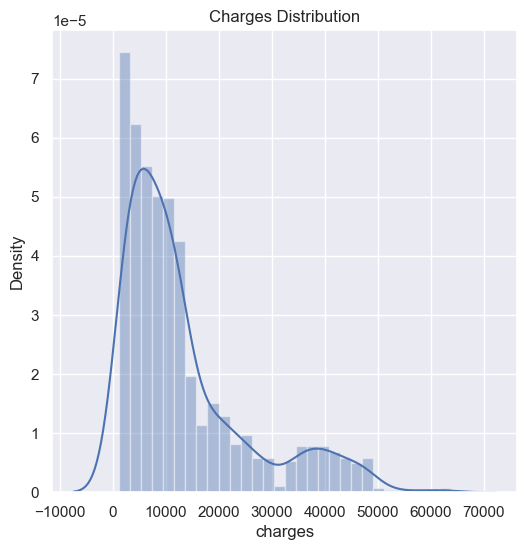

In [71]:
#Charges Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data PreProcessing

encoding categorical features

In [75]:
# encoding sex column
df.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

#encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)



Splitting the features and Target

In [76]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [77]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [78]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training and Testing data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
regressor = LinearRegression()


In [92]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [93]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [96]:
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)


R squared value: 0.751505643411174


In [97]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)


In [98]:
#R SQUARED VALUE
r2_test=metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


in this case r2_train and r2_test are almost equal

In [100]:
#building predive system


In [101]:
input_data=(31,1,25.74,0,1,0)

#changing input data to numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


In [102]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.0805764960496
